<a href="https://colab.research.google.com/github/beckerbeckerbecker/CapstoneCapstoneCapstone/blob/main/EK2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-9752afcfac4f>:17: RuntimeWarning: overflow encountered in double_scalars
  return -c*N_witches*N_princes + k*N_frogs*N_princesses
<ipython-input-2-9752afcfac4f>:20: RuntimeWarning: overflow encountered in double_scalars
  return -c*N_witches*N_princesses + k*N_sleeping_beauties*N_princesses
<ipython-input-2-9752afcfac4f>:17: RuntimeWarning: invalid value encountered in double_scalars
  return -c*N_witches*N_princes + k*N_frogs*N_princesses
<ipython-input-2-9752afcfac4f>:20: RuntimeWarning: invalid value encountered in double_scalars
  return -c*N_witches*N_princesses + k*N_sleeping_beauties*N_princesses


ValueError: ignored

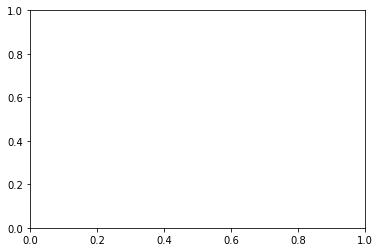

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define initial conditions
N_princes = 100
N_princesses = 100
N_frogs = 0
N_sleeping_beauties = 0

# Define values for constants and parameters
c = 0.1
k = 0.01
N_witches = 1000

# Define functions for differential equations
def dN_princes_dt(N_princes, N_princesses, N_witches):
    return -c*N_witches*N_princes + k*N_frogs*N_princesses

def dN_princesses_dt(N_princes, N_princesses, N_witches):
    return -c*N_witches*N_princesses + k*N_sleeping_beauties*N_princesses

# Define time range and time step
t = np.linspace(0, 100, 1000)
dt = t[1] - t[0]

# Solve differential equations numerically using Euler's method
for i in range(len(t)-1):
    N_princes += dN_princes_dt(N_princes, N_princesses, N_witches) * dt
    N_princesses += dN_princesses_dt(N_princes, N_princesses, N_witches) * dt

# Plot results
plt.plot(t, N_princes, label='Princes')
plt.plot(t, N_princesses, label='Princesses')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()


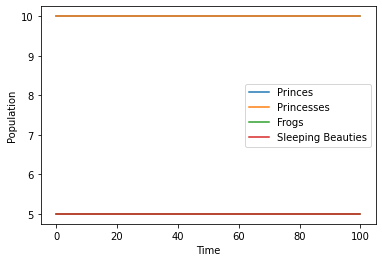

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def pfpbs_model(state, t, c_pf, c_psb, k_fp, k_sbp, N_witches):
    N_princes, N_princesses, N_frogs, N_sleeping_beauties = state
    dN_princes_dt = -c_pf * N_witches * N_princes + k_fp * N_frogs * N_princesses
    dN_princesses_dt = -c_psb * N_witches * N_princesses + k_sbp * N_sleeping_beauties * N_princesses
    dN_frogs_dt = c_pf * N_witches * N_princes - k_fp * N_frogs * N_princesses
    dN_sleeping_beauties_dt = c_psb * N_witches * N_princesses - k_sbp * N_sleeping_beauties * N_princesses
    return [dN_princes_dt, dN_princesses_dt, dN_frogs_dt, dN_sleeping_beauties_dt]

# Initial conditions
N_princes_0 = 10
N_princesses_0 = 10
N_frogs_0 = 5
N_sleeping_beauties_0 = 5
state_0 = [N_princes_0, N_princesses_0, N_frogs_0, N_sleeping_beauties_0]

# Parameters
c_pf = 0.1
k_fp = 0.1
k_sbp = 0.01
N_witches = 5 #1000

# Time points
t = np.linspace(0, 100, 1000)

# Solve ODE system
state = odeint(pfpbs_model, state_0, t, args=(c_pf, c_psb, k_fp, k_sbp, N_witches))

# Plot results
plt.plot(t, state[:,0], label='Princes')
plt.plot(t, state[:,1], label='Princesses')
plt.plot(t, state[:,2], label='Frogs')
plt.plot(t, state[:,3], label='Sleeping Beauties')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

In [17]:
pip install mesa


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
from mesa import Model
from mesa.space import SingleGrid
from mesa.time import RandomActivation
from mesa.datacollection import DataCollector
from mesa.visualization.modules import CanvasGrid
from mesa.visualization.ModularVisualization import ModularServer
import random

class Witch:
    def __init__(self, pos, model):
        self.pos = pos
        self.model = model
    
    def move(self):
        possible_steps = self.model.grid.get_neighborhood(self.pos, moore=True, include_center=False)
        new_pos = random.choice(possible_steps)
        self.model.grid.move_agent(self, new_pos)
    
    def curse(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        for cellmate in cellmates:
            if isinstance(cellmate, (Prince, Princess)):
                if random.random() < self.model.cf:
                    cellmate.transform()

class Prince:
    def __init__(self, pos, model):
        self.pos = pos
        self.model = model
    
    def move(self):
        possible_steps = self.model.grid.get_neighborhood(self.pos, moore=True, include_center=False)
        new_pos = random.choice(possible_steps)
        self.model.grid.move_agent(self, new_pos)
    
    def transform(self):
        self.model.grid.remove_agent(self)
        frog = Frog(self.pos, self.model)
        self.model.grid.place_agent(frog, self.pos)
        self.model.schedule.add(frog)
    
    def kiss(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        for cellmate in cellmates:
            if isinstance(cellmate, SleepingBeauty):
                if random.random() < self.model.kf:
                    cellmate.transform()

class Princess:
    def __init__(self, pos, model):
        self.pos = pos
        self.model = model
    
    def move(self):
        possible_steps = self.model.grid.get_neighborhood(self.pos, moore=True, include_center=False)
        new_pos = random.choice(possible_steps)
        self.model.grid.move_agent(self, new_pos)
    
    def transform(self):
        self.model.grid.remove_agent(self)
        sleeping_beauty = SleepingBeauty(self.pos, self.model)
        self.model.grid.place_agent(sleeping_beauty, self.pos)
        self.model.schedule.add(sleeping_beauty)
    
    def kiss(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        for cellmate in cellmates:
            if isinstance(cellmate, Frog):
                if random.random() < self.model.kf:
                    cellmate.transform()

class Frog:
    def __init__(self, pos, model):
        self.pos = pos
        self.model = model
    
    def move(self):
        possible_steps = self.model.grid.get_neighborhood(self.pos, moore=True, include_center=False)
        new_pos = random.choice(possible_steps)
        self.model.grid.move_agent(self, new_pos)
    
    def transform(self):
        self.model.grid.remove_agent(self)
        prince = Prince(self.pos, self.model)
        self.model.grid.place_agent(prince, self.pos)
        self.model.schedule.add(prince)

class SleepingBeauty:
    def __init__(self, pos, model):
        self.pos = pos
        self.model = model
    
    def transform(self):
        self.model.grid.remove_agent(self)
        princess = Princess(self.pos, self.model)
        self.model.grid.place_agent(princess, self.pos)
        self.model.schedule.add(princess)

class PFPSBModel(Model):
    def __init__(self, N, cf, kf, width, height):


SyntaxError: ignored

In [23]:
from mesa import Model, Agent
from mesa.space import MultiGrid
from mesa.time import RandomActivation
import random

class Witch(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        
    def step(self):
        possible_moves = self.model.grid.get_neighborhood(self.pos, moore=True, include_center=False)
        new_position = self.random.choice(possible_moves)
        neighbors = self.model.grid.get_neighbors(self.pos, moore=True, include_center=False)
        for neighbor in neighbors:
            if isinstance(neighbor, (Prince, Princess)):
                if self.model.random.random() < self.model.curse_factor:
                    neighbor.turn_into_frog()
        
class Prince(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.is_frog = False
        
    def turn_into_frog(self):
        self.is_frog = True
        
    def turn_into_prince(self):
        self.is_frog = False
        
    def step(self):
        if self.is_frog:
            possible_moves = self.model.grid.get_neighborhood(self.pos, moore=True, include_center=False)
            new_position = self.random.choice(possible_moves)
            neighbors = self.model.grid.get_neighbors(self.pos, moore=True, include_center=False)
            for neighbor in neighbors:
                if isinstance(neighbor, SleepingBeauty):
                    if self.model.random.random() < self.model.kissing_factor:
                        neighbor.turn_into_princess()
                        self.turn_into_prince()
        
class Princess(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.is_sleeping = False
        
    def turn_into_sleeping_beauty(self):
        self.is_sleeping = True
        
    def turn_into_princess(self):
        self.is_sleeping = False
        
    def step(self):
        possible_moves = self.model.grid.get_neighborhood(self.pos, moore=True, include_center=False)
        new_position = self.random.choice(possible_moves)
        neighbors = self.model.grid.get_neighbors(self.pos, moore=True, include_center=False)
        for neighbor in neighbors:
            if isinstance(neighbor, Frog):
                if self.model.random.random() < self.model.kissing_factor:
                    neighbor.turn_into_prince()
                    self.turn_into_sleeping_beauty()

class Frog(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        
    def turn_into_prince(self):
        self.model.schedule.remove(self)
        new_prince = Prince(self.unique_id, self.model)
        self.model.grid.place_agent(new_prince, self.pos)
        self.model.schedule.add(new_prince)
        
    def step(self):
        possible_moves = self.model.grid.get_neighborhood(self.pos, moore=True, include_center=False)
        new_position = self.random.choice(possible_moves)
        
class SleepingBeauty(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        
    def step(self):
        pass

class EnchantedKingdomModel(Model):
    def __init__(self, height, width, curse_factor, kissing_factor, num_witches, num_princes, num_princesses, num_sleeping_beauties):
        super().__init__()
        self.height = height
        self.width = width
        self.curse_factor = curse_factor
        self.kissing_factor = kissing_factor
        self.grid = MultiGrid(height, width, True)
        self.schedule = RandomActivation(self)
        


In [25]:
#@title
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import SingleGrid

class Witch(Agent):
    def __init__(self, unique_id, model, cf):
        super().__init__(unique_id, model)
        self.cf = cf

    def step(self):
        self.move()
        neighbors = self.model.grid.get_neighbors(self.pos, moore=True)
        for neighbor in neighbors:
            if isinstance(neighbor, (Prince, Princess)):
                if random.random() < self.cf:
                    neighbor.transform()

    def move(self):
        possible_steps = self.model.grid.get_neighborhood(self.pos, moore=True, include_center=False)
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

class Prince(Agent):
    def __init__(self, unique_id, model, kf):
        super().__init__(unique_id, model)
        self.kf = kf

    def step(self):
        self.move()
        neighbors = self.model.grid.get_neighbors(self.pos, moore=True)
        for neighbor in neighbors:
            if isinstance(neighbor, SleepingBeauty):
                if random.random() < self.kf:
                    neighbor.transform()

    def move(self):
        possible_steps = self.model.grid.get_neighborhood(self.pos, moore=True, include_center=False)
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

    def transform(self):
        frog = Frog(self.model.next_id(), self.model, self.kf)
        self.model.grid.place_agent(frog, self.pos)
        self.model.schedule.add(frog)
        self.model.grid.remove_agent(self)
        self.model.schedule.remove(self)

class Frog(Prince):
    def transform(self):
        prince = Prince(self.model.next_id(), self.model, self.kf)
        self.model.grid.place_agent(prince, self.pos)
        self.model.schedule.add(prince)
        self.model.grid.remove_agent(self)
        self.model.schedule.remove(self)

class Princess(Agent):
    def __init__(self, unique_id, model, kf):
        super().__init__(unique_id, model)
        self.kf = kf

    def step(self):
        self.move()
        neighbors = self.model.grid.get_neighbors(self.pos, moore=True)
        for neighbor in neighbors:
            if isinstance(neighbor, Frog):
                if random.random() < self.kf:
                    neighbor.transform()

    def move(self):
        possible_steps = self.model.grid.get_neighborhood(self.pos, moore=True, include_center=False)
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

    def transform(self):
        sleeping_beauty = SleepingBeauty(self.model.next_id(), self.model, self.cf)
        self.model.grid.place_agent(sleeping_beauty, self.pos)
        self.model.schedule.add(sleeping_beauty)
        self.model.grid.remove_agent(self)
        self.model.schedule.remove(self)

class SleepingBeauty(Princess):
    def transform(self):
        raise Exception("Frogs cannot transform a sleeping beauty into a princess")

class PFPSBModel(Model):
    def __init__(self, width, height, cf, kf, num_witches, num_princes, num_princesses):
        self.width = width
        self.height = height
        self.cf = cf
        self.kf = kf
        self.grid = SingleGrid(width, height, torus=True)
        self


In [27]:
from mesa.visualization.modules import CanvasGrid
from mesa.visualization.ModularVisualization import ModularServer

# create a visualization
grid = CanvasGrid(agent_portrayal, 50, 50, 500, 500)

# create a server
server = ModularServer(PFPSBModel,
                       [grid],
                       "PFPSB Model",
                       {"num_witches": 10, "num_princes": 10, "num_princesses": 10})

# run the model for 100 steps
server.run_model(100)


NameError: ignored